In [ ]:
# GAUSSIAN BLUR
# Source: https://arxiv.org/pdf/2002.05709.pdf
"""
Gaussian blur This augmentation is in our default policy. We find it helpful, as it improves our ResNet-50 trained for
100 epochs from 63.2% to 64.5%. We blur the image 50% of the time using a Gaussian kernel. We randomly sample
σ ∈ [0.1, 2.0], and the kernel size is set to be 10% of the image height/width.
"""

In [ ]:
def gaussian_blur():
  # Kernel Size is 10% of image height/width
  # Blur image 50% of the time using a Gaussian Kernel
  # dst = cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType=BORDER_DEFAULT]]] )


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

# Download Dataset
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


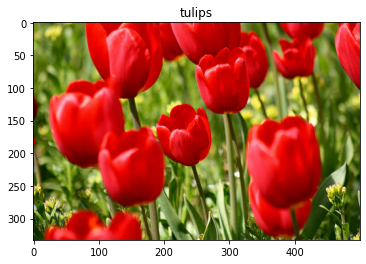

In [13]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [39]:
# GAUSSIAN BLUR
#==================================================================
# Source: https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

In [101]:
# Test Gaussian Blur
# Syntax: dst = cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType=BORDER_DEFAULT]]] )
# Kernel Size is 10% of image height/width
# https://pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/
print(image.shape)
print("Height:",image.shape[0])
print("Width:",image.shape[1])
src = np.float32(image)
# apply guassian blur on src image
# Only apply 10% filter if the image is square shaped (height = width)
if (image.shape[0] == image.shape[1]):
  height_gauss = 0.1 *  image.shape[0]
  width_gauss = 0.1 * image.shape[1]
else:
  height_gauss = 0.1 *  image.shape[0]
  width_gauss = 0.1 * image.shape[1]
  minimum = min(height_gauss, width_gauss)
  height_gauss = minimum
  width_gauss = minimum
# To pass into function the values have to be Odd
height_gauss = int(height_gauss)
width_gauss = int(width_gauss)
if height_gauss % 2 == 0:
  height_gauss += 1
if width_gauss % 2 == 0:
  width_gauss += 1
ksize = (height_gauss, width_gauss)
print(ksize)

# Sigma - standard deviation along axis
# We randomly sample σ ∈ [0.1, 2.0]
# source: https://pynative.com/python-get-random-float-numbers/
# https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1
sigma_x = random.uniform(0.1,2.0)
sigma_y = random.uniform(0.1,2.0)
print(sigma_x)
print(sigma_y)
dst = cv2.GaussianBlur(src,ksize=ksize,sigmaX=sigma_x,sigmaY=sigma_y,borderType=cv2.BORDER_DEFAULT)

(283, 500, 3)
Height: 283
Width: 500
(29, 29)
0.7993151948069578
1.6170991639779035


In [59]:
# use the following function to visualize and compare the original and augmented images side-by-side, to Visualize Results
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

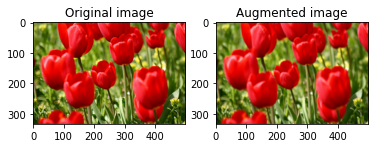

In [90]:
visualize(src.astype(np.uint8), dst.astype(np.uint8))
# Issue: https://stackoverflow.com/questions/49643907/clipping-input-data-to-the-valid-range-for-imshow-with-rgb-data-0-1-for-floa

In [102]:
# Test Gaussian Blur with 50% probability
def gaussian_blur_fix(image):
  number = random.choice([0,1])
  src = np.float32(image)
  if number == 1:
    # Gaussian blur function
    if (image.shape[0] == image.shape[1]):
      height_gauss = 0.1 *  image.shape[0]
      width_gauss = 0.1 * image.shape[1]
    else:
      height_gauss = 0.1 *  image.shape[0]
      width_gauss = 0.1 * image.shape[1]
      minimum = min(height_gauss, width_gauss)
      height_gauss = minimum
      width_gauss = minimum
    # To pass into function the values have to be Odd
    height_gauss = int(height_gauss)
    width_gauss = int(width_gauss)
    if height_gauss % 2 == 0:
      height_gauss += 1
    if width_gauss % 2 == 0:
      width_gauss += 1
    ksize = (height_gauss, width_gauss)
    sigma_x = random.uniform(0.1,2.0)
    sigma_y = random.uniform(0.1,2.0)
    dst = cv2.GaussianBlur(src,ksize=ksize,sigmaX=sigma_x,sigmaY=sigma_y,borderType=cv2.BORDER_DEFAULT)
  elif number == 0:
    dst = src
  visualize(src.astype(np.uint8), dst.astype(np.uint8)) # to visualize outputs





In [97]:
# Apply augmentation to dataset
(train_datasets, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [98]:
# Resize and rescale image to a uniform size
IMG_SIZE = 224
def resize_and_rescale(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  return image, label

In [99]:
# using tf.data.experimental.Counter
# Create a `Counter` object and `Dataset.zip` it together with the training set.
counter = tf.data.experimental.Counter()
train_ds = tf.data.Dataset.zip((train_datasets, (counter, counter)))

Image Detected
Image Detected
Image Detected
Image Detected
Image Detected
Image Detected
Image Detected
Image Detected
Image Detected
Image Detected
Image Detected


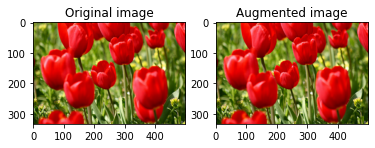

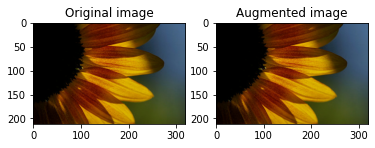

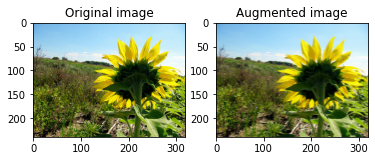

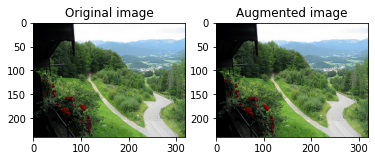

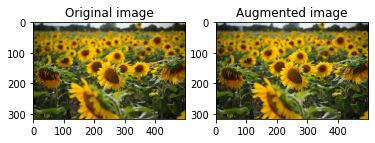

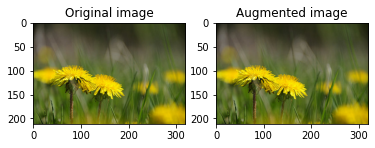

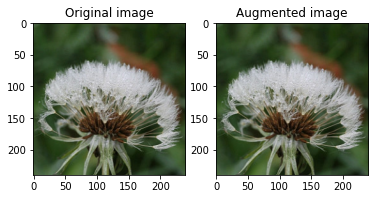

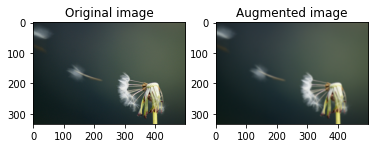

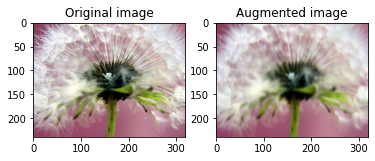

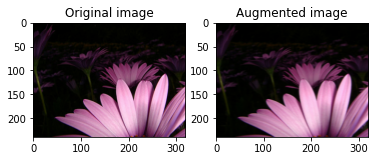

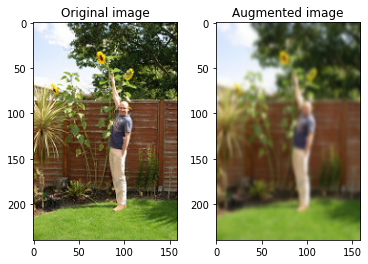

In [103]:
i = 0
for image, label in train_datasets:
  if i <= 10:
    print("Image Detected")
    image_distor = gaussian_blur_fix(image)
  i += 1

In [ ]:
print(train_ds)

<PrefetchDataset element_spec=((TensorSpec(shape=(None, None, None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None)), (TensorSpec(shape=(None, None), dtype=tf.int64, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None)))>


In [ ]:
# Validation Dataset
val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

In [ ]:
# Test Dataset
test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)